<a href="https://colab.research.google.com/github/shreyapande1/DM_Project/blob/main/DM_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [ ]:
url_df = "https://raw.githubusercontent.com/shreyapande1/DM_Project/main/heart_dataset_raw.csv"
df=pd.read_csv(url_df)

## **EDA**: **Exploratory** **Data** **Analyis**

<Axes: >

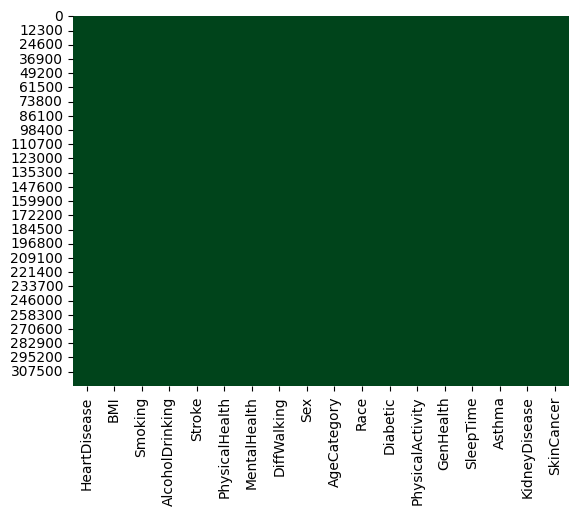

In [ ]:
# Using Heatmap Vizualization to Check of Null values
sns.heatmap(df.isna(),cmap="Greens_r", cbar=False)
#Insight: At High level there are no Missing values

In [ ]:
# Quality Checking our result to ensure that thier are missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
#Data Cleaning
df=df.replace(to_replace=["No, borderline diabetes", "Yes (during pregnancy)"],value=["No","Yes"])

In [ ]:
df1 = df.groupby(['AgeCategory', 'Sex'])['HeartDisease'].count().reset_index()
df1.columns=["source", "target","value"]
#Same activity Gender is the Source and survived or not survied as 
df2=df.reset_index()
df3 = df2.groupby(['Sex','HeartDisease'])['index'].count().reset_index()
df3.columns=["source", "target","value"]

#Change the Col Names
df3
df_concat=pd.concat([df1, df3], axis=0)
source_target=list(pd.unique(df_concat[["source","target"]].values.ravel('K')))
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}

In [ ]:
df_concat['source'] = df_concat['source'].map(mapping_dict)
df_concat['target'] = df_concat['target'].map(mapping_dict)

In [ ]:
#Creating a Dictonary
mapping_dict = {k: v for v, k in enumerate(source_target)}
#Modifing the DataFrame
links_dict=df_concat.to_dict(orient="list")

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "green", width = 0.7),
      label = source_target,
      color = "lightseagreen"
    ),
    link = dict(
      source = links_dict["source"],
      target = links_dict["target"],
      value = links_dict["value"]
  ))])

In [ ]:
fig.update_layout(title_text= "Sankey Diagram Heart Disease", font_size=10)
fig.show()
# From this we can see that we have very less number of Individulas who are suffering from Heart Disease
# and we  may need to upsample our data
#Insight 2:
# Also we can see that the males have are at A higher risk of Heart Disease

In [ ]:
# Doing Quality Check of the above graph
df_QC=df[df['HeartDisease']=='Yes']
df_QC.groupby(['Sex'])['HeartDisease'].count()

Sex
Female    11234
Male      16139
Name: HeartDisease, dtype: int64

In [ ]:
#Data Cleaning
df=df.replace(to_replace=["No, borderline diabetes", "Yes (during pregnancy)"],
           value=["No","Yes"])

In [ ]:
df_Heart_Disease=df[df['HeartDisease']=='Yes']
age_sex_groups = df_Heart_Disease.groupby(['AgeCategory', 'Sex'])['HeartDisease'] .count().reset_index()
import plotly.express as px
fig = px.bar(age_sex_groups, x='AgeCategory', y='HeartDisease', color='Sex', barmode='group')
fig.update_layout(title='Heart Disease by Age Category and Sex', xaxis_title='Age Category', yaxis_title='Heart Disease', legend_title='Sex')
fig.show()

In [ ]:
df_chart_sorted = df_Heart_Disease.sort_values('AgeCategory')
import plotly.express as px
fig = px.violin(df_chart_sorted, x='AgeCategory', y='BMI', box=True, points='all',color='AgeCategory')
fig.update_layout(title='BMI by Age Category', xaxis_title='Age Category', yaxis_title='BMI')
fig.show()

In [ ]:
df_chart=df_Heart_Disease.groupby(['Race','Sex','GenHealth'])['HeartDisease'].count().reset_index()
fig=px.sunburst(df_chart, path=['Race','Sex','GenHealth'],values='HeartDisease',width=800,height=600)
fig.show()

In [ ]:
df_chart2=df[df['HeartDisease']=='No']
df_chart2=df_chart2.groupby(['Race','Sex','GenHealth'])['HeartDisease'].count().reset_index()
fig=px.sunburst(df_chart2, path=['Race','Sex', 'GenHealth'],values='HeartDisease',width=800,height=600)
fig.show()

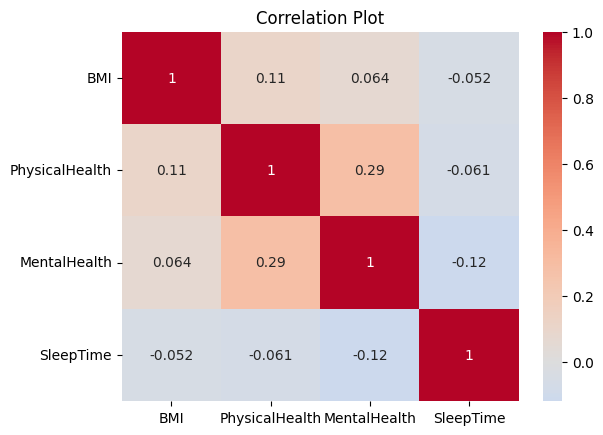

In [ ]:
# Correlation Plot of the Numerical Data
x=df.select_dtypes(include=np.number)
corr_matrix = x.corr()

corr_matrix = df.corr()

# Create the correlation plot using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)

# Set the title of the plot
plt.title('Correlation Plot')

# Show the plot
plt.show()

<ipython-input-19-d4362bb7799d>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-19-d4362bb7799d>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-19-d4362bb7799d>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-19-d4362bb7799d>:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




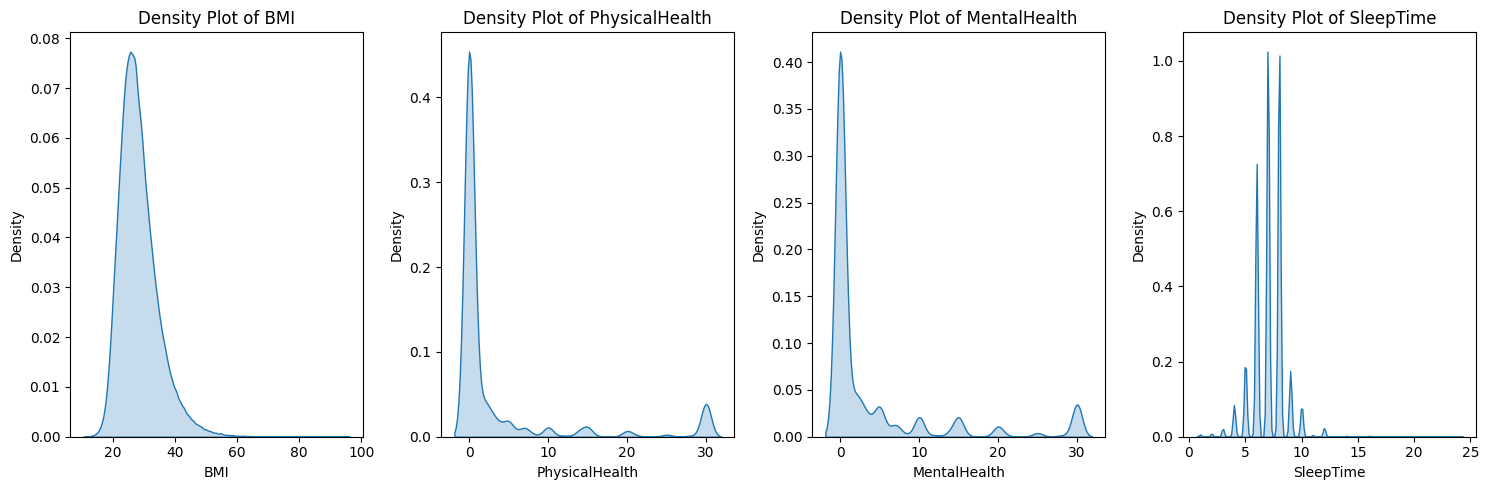

In [ ]:
columns = x.columns
# create a loop to create density plots for each column

# creating a 2x2 grid of plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))

# create a loop to create density plots for each column
for i, column in enumerate(columns):
    # create a density plot for the current column
    sns.kdeplot(df[column], shade=True, ax=axes[i])
    
    # add labels and title to the plot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].set_title('Density Plot of ' + column)
# display the plot
plt.tight_layout()
plt.show()

In [ ]:
np.issubdtype(df['HeartDisease'].dtype, np.number)==False

True

**Removing** **Outliers**

In [ ]:
def out_remover(df):
  for i in df.columns:
    #Selecting the numerical columns in the Datset
    if(np.issubdtype(df[i].dtype, np.number)==True):
      #Defining q1 and q3
      q1, q3 = np.percentile(df[i],[25, 75])
      iqr = q3 - q1
      inner_fence = q1 - 1.5 * iqr
      outer_fence = q3 + 1.5 * iqr
      #Filtering the Data
      df=df[(df[i] >= inner_fence) & (df[i] <= outer_fence)]

In [ ]:
out_remover(df)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


**Converting categorical columns to numerical values**

In [ ]:
# We try to use one hot encoding to get categorical column values to numerical values

In [ ]:
df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']] = df[['HeartDisease', 
                                                                                                                                                           'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Diabetic', 
                                                                                                                                                           'Asthma', 'KidneyDisease', 'SkinCancer']].replace({'Yes': 1, 'No': 0})

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
one_hot_encoded_others = pd.get_dummies(df[['Sex', 'AgeCategory', 'Race', 'GenHealth']])
df = df.join(one_hot_encoded_others)

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Sex_Female', 'Sex_Male',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good'],
      dtype='object')

In [ ]:
# Categorical columns are dropped as they have been encoded and not important for our classification model input anymore
df.drop(columns=['Sex', 'AgeCategory', 'GenHealth', 'Race'], inplace=True)

In [ ]:
# Checking if all categorical values are removed
df.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Diabetic                                 int64
PhysicalActivity                         int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
Sex_Female                               uint8
Sex_Male                                 uint8
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_30-34                        uint8
AgeCategory_35-39                        uint8
AgeCategory_40-44                        uint8
AgeCategory_4

**Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)
df_upsampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [ ]:
print('Pre SMOTE:', y.value_counts())
print('Post SMOTE:', y_resampled.value_counts())

Pre SMOTE: 0    292422
1     27373
Name: HeartDisease, dtype: int64
Post SMOTE: 0    292422
1    292422
Name: HeartDisease, dtype: int64


In [ ]:
df_upsampled.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,HeartDisease
0,16.60,1,0,0,3.0,30.0,0,1,1,5.0,...,0,0,0,1,0,0,0,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,1,7.0,...,0,0,0,1,0,0,0,0,1,0
2,26.58,1,0,0,20.0,30.0,0,1,1,8.0,...,0,0,0,1,0,1,0,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,0,6.0,...,0,0,0,1,0,0,1,0,0,0
4,23.71,0,0,0,28.0,0.0,1,0,1,8.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Our oversampled set has 50% people with heart disease

# **Classification** **Models**

**Decision** **Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
X = df_upsampled.drop('HeartDisease', axis=1)
y = df_upsampled['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
cllsie = DecisionTreeClassifier(random_state=42)
cllsie.fit(X_train, y_train)
y_pred = cllsie.predict(X_test)

Accuracy for Decision Tree: 0.90
Sensitivity for Decision Tree: 0.91
F1 score for Decision Tree: 0.9007479940160479
MAE for Decision Tree: 0.09982833028978667
MSE for Decision Tree: 0.09982833028978667
Confusion matrix for Decision Tree:
 [[65383  7729]
 [ 6867 66232]]
AUC for Decision Tree: 0.9001721931131921


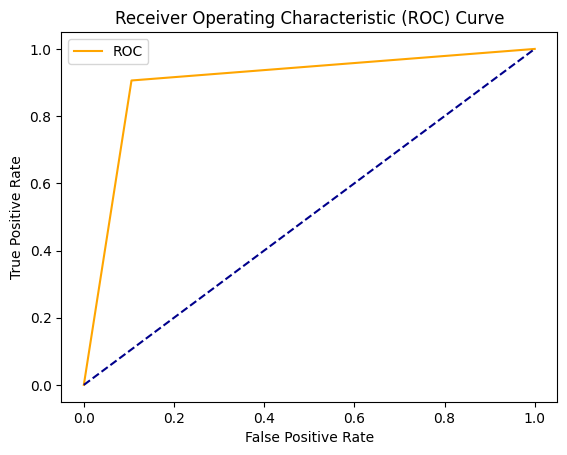

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Decision Tree: {:.2f}".format(accuracy))
print("Sensitivity for Decision Tree: {:.2f}".format(sensitivity))
print('F1 score for Decision Tree:', f1)
print('MAE for Decision Tree:', mae)
print('MSE for Decision Tree:', mse)
print('Confusion matrix for Decision Tree:\n', cm)
print('AUC for Decision Tree:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df_upsampled.iloc[:, :-1]
y = df_upsampled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Creating a Random Forest Classifier with 100 decision trees
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)


Accuracy for Random Forest: 0.92
Sensitivity for Random Forest: 0.91
F1 score for Random Forest: 0.9234157725395971
MAE for Random Forest: 0.07586296516677951
MSE for Random Forest: 0.07586296516677951
Confusion matrix for Random Forest:
 [[68248  4864]
 [ 6228 66871]]
AUC for Random Forest: 0.9241362047693187


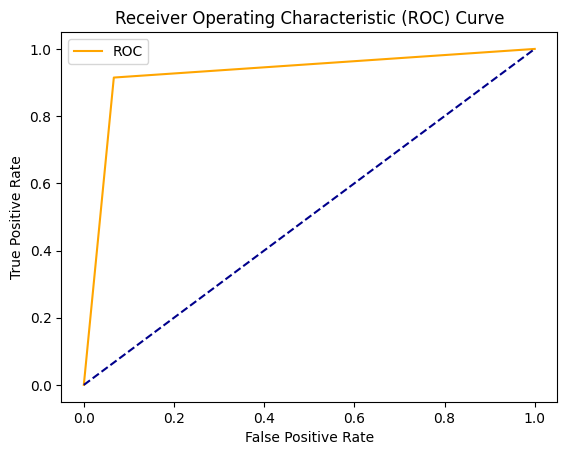

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Random Forest: {:.2f}".format(accuracy))
print("Sensitivity for Random Forest: {:.2f}".format(sensitivity))
print('F1 score for Random Forest:', f1)
print('MAE for Random Forest:', mae)
print('MSE for Random Forest:', mse)
print('Confusion matrix for Random Forest:\n', cm)
print('AUC for Random Forest:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [ ]:
import missingno as msno
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import os
from sklearn.utils import resample

In [ ]:
X = df_upsampled.drop(columns='HeartDisease')
y = df_upsampled['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True)

In [ ]:
GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=15, learning_rate=0.4, random_state=44)
GBCModel.fit(X_train, y_train)

In [ ]:
y_pred = GBCModel.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

Accuracy for Gradient Boosting: 0.94
Sensitivity for Gradient Boosting : 0.92
F1 score for Gradient Boosting: 0.9362379707403905
MAE for Gradient Boosting: 0.06271757938869169
MSE for Gradient Boosting: 0.06271757938869169
Confusion matrix for Gradient Boosting:
 [[69718  3516]
 [ 5654 67323]]
AUC for Gradient Boosting: 0.9372565239400195


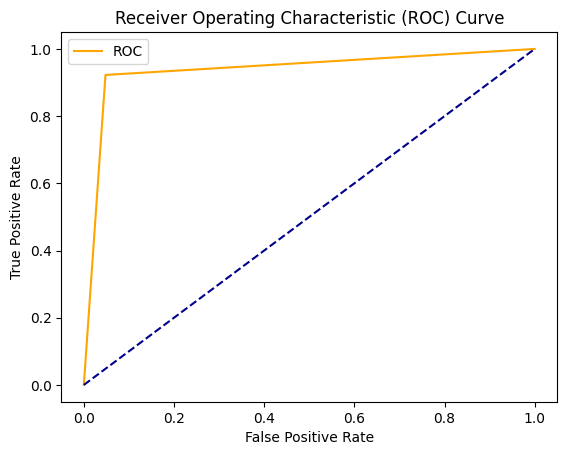

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Gradient Boosting: {:.2f}".format(accuracy))
print("Sensitivity for Gradient Boosting : {:.2f}".format(sensitivity))
print('F1 score for Gradient Boosting:', f1)
print('MAE for Gradient Boosting:', mae)
print('MSE for Gradient Boosting:', mse)
print('Confusion matrix for Gradient Boosting:\n', cm)
print('AUC for Gradient Boosting:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df_upsampled['HeartDisease']
x=df_upsampled.drop(['HeartDisease'],axis=1)

In [ ]:
X_train,X_test ,y_train, y_test = train_test_split(x,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

Accuracy for Logistic Regression: 0.50
Sensitivity for Logistic Regression : 0.48
F1 score for Logistic Regression: 0.49121880731395545
MAE for Logistic Regression: 0.5008925457044956
MSE for Logistic Regression: 0.5008925457044956
Confusion matrix for Logistic Regression:
 [[37621 35485]
 [37751 35354]]
AUC for Logistic Regression: 0.4991073482735515


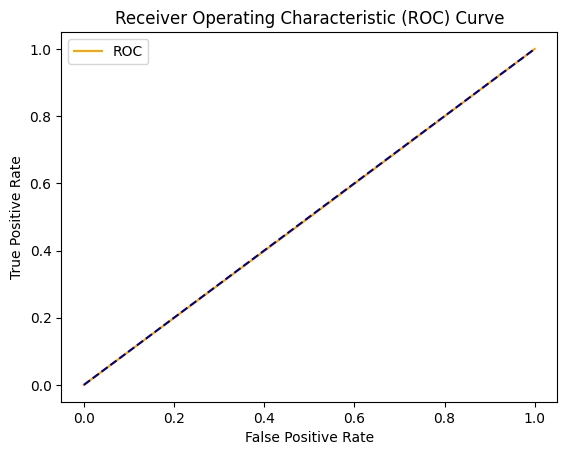

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Logistic Regression: {:.2f}".format(accuracy))
print("Sensitivity for Logistic Regression : {:.2f}".format(sensitivity))
print('F1 score for Logistic Regression:', f1)
print('MAE for Logistic Regression:', mae)
print('MSE for Logistic Regression:', mse)
print('Confusion matrix for Logistic Regression:\n', cm)
print('AUC for Logistic Regression:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Naive Bayes classification algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

In [ ]:
X = df_upsampled.drop(['HeartDisease'], axis=1) 
y = df_upsampled["HeartDisease"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy for Logistic Regression: 0.77
Sensitivity for Logistic Regression : 0.94
F1 score for Logistic Regression: 0.7997029343999627
MAE for Logistic Regression: 0.23426417984966932
MSE for Logistic Regression: 0.23426417984966932
Confusion matrix for Logistic Regression:
 [[43582 29530]
 [ 4722 68377]]
AUC for Logistic Regression: 0.7657509043300015


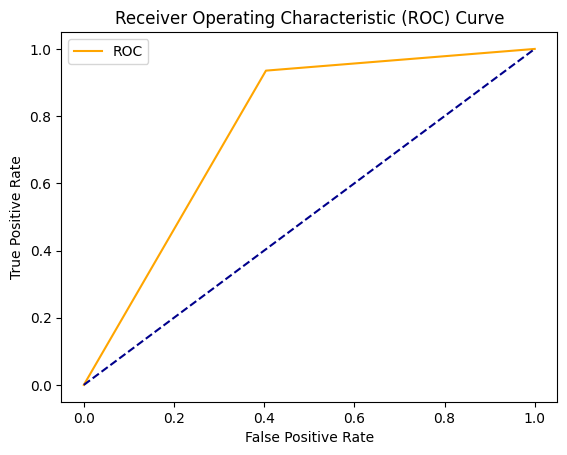

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print("Accuracy for Naive Bais: {:.2f}".format(accuracy))
print("Sensitivity for Naive Bais : {:.2f}".format(sensitivity))
print('F1 score for Naive Bais:', f1)
print('MAE for Naive Bais:', mae)
print('MSE for Naive Bais:', mse)
print('Confusion matrix for Naive Bais:\n', cm)
print('AUC for Naive Bais:', auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()